In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        pass  # Keeping loop valid without printing

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All")
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [ ]:
import os
import cv2
import numpy as np

X_train = []
Y_train = []
image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load Training Images
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/archive (1)/Training', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)

# Load Testing Images
for label in labels:
    folderPath = os.path.join('/content/drive/MyDrive/archive (1)/Testing', label)
    for filename in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath, filename))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        Y_train.append(label)


X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.1, random_state=101)

In [ ]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Convert string labels to integers if they are not already
if isinstance(Y_train[0], str):
    Y_train_new = []
    for i in Y_train:
        Y_train_new.append(labels.index(i))
    Y_train = Y_train_new

if isinstance(Y_test[0], str):
    Y_test_new = []
    for i in Y_test:
        Y_test_new.append(labels.index(i))
    Y_test = Y_test_new

import tensorflow as tf
# Perform one-hot encoding
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(Conv2D(256,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation = 'softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,Y_train,epochs=20,validation_split=0.1)

Epoch 1/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1192s 7s/step - accuracy: 0.3164 - loss: 4.2141 - val_accuracy: 0.4921 - val_loss: 1.1711
Epoch 2/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1240s 7s/step - accuracy: 0.6611 - loss: 0.8299 - val_accuracy: 0.5506 - val_loss: 1.1360
Epoch 3/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1194s 7s/step - accuracy: 0.7503 - loss: 0.6054 - val_accuracy: 0.6203 - val_loss: 0.9423
Epoch 4/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1150s 6s/step - accuracy: 0.7809 - loss: 0.5231 - val_accuracy: 0.6487 - val_loss: 0.9282
Epoch 5/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1088s 6s/step - accuracy: 0.8179 - loss: 0.4517 - val_accuracy: 0.6013 - val_loss: 1.2775
Epoch 6/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1098s 6s/step - accuracy: 0.8545 - loss: 0.3867 - val_accuracy: 0.7089 - val_loss: 0.8929
Epoch 7/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1092s 6s/step - accuracy: 0.8585 - loss: 0.3377 - val_accuracy: 0.7326 - val_loss: 0.7560
Epoch 8/20
178/178 ━━━━━━━━━━━━━━━━━━━━ 1114s 6s/step - accuracy: 0.9032 - loss: 0.2633 - 

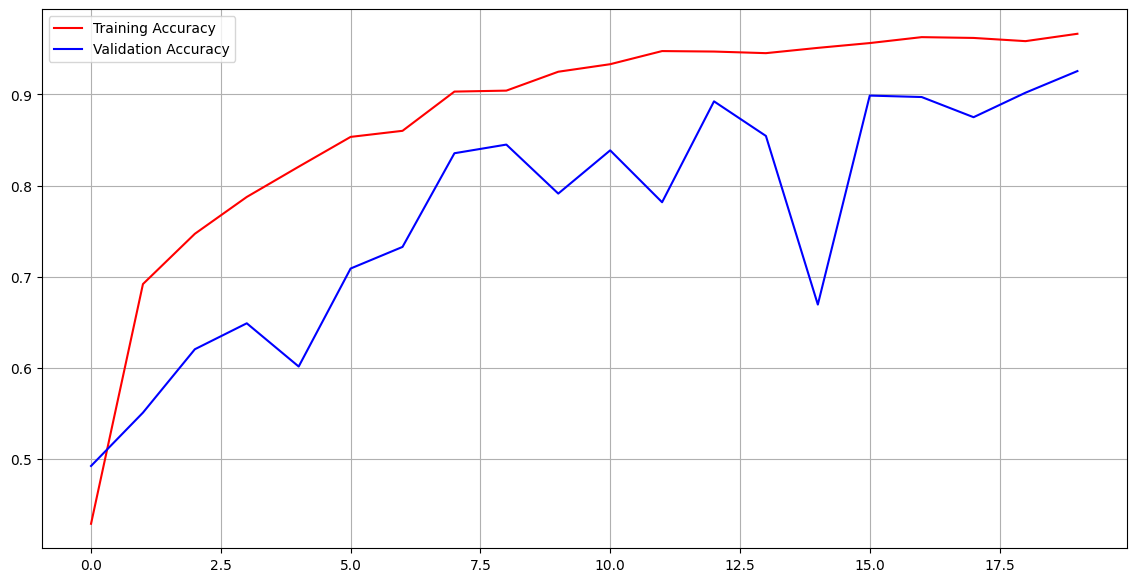

In [ ]:
import matplotlib.pyplot as plt


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

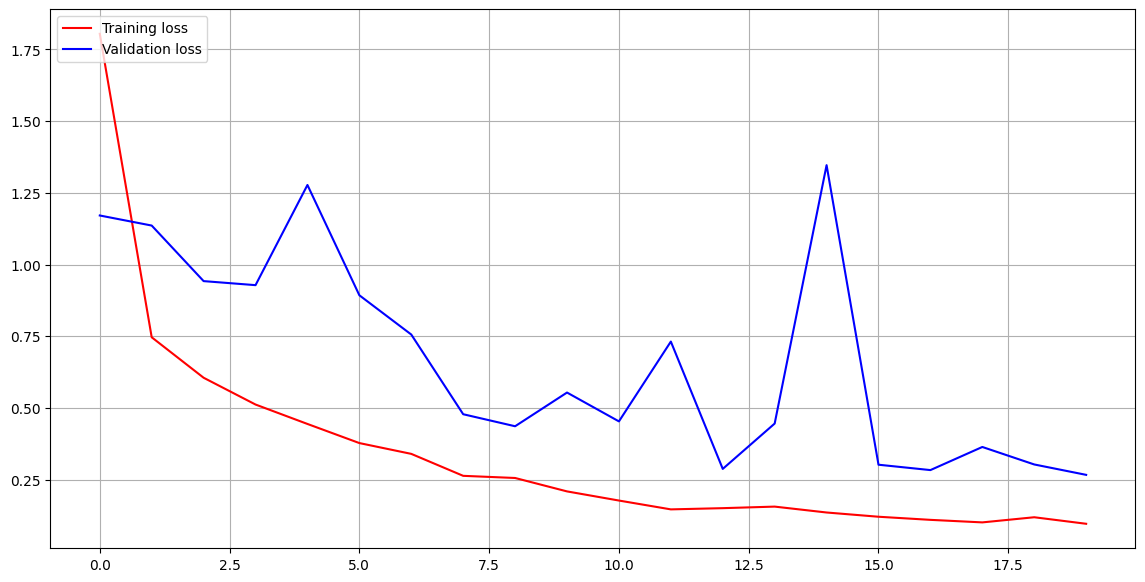

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

fig = plt.figure(figsize=(14,7))
plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

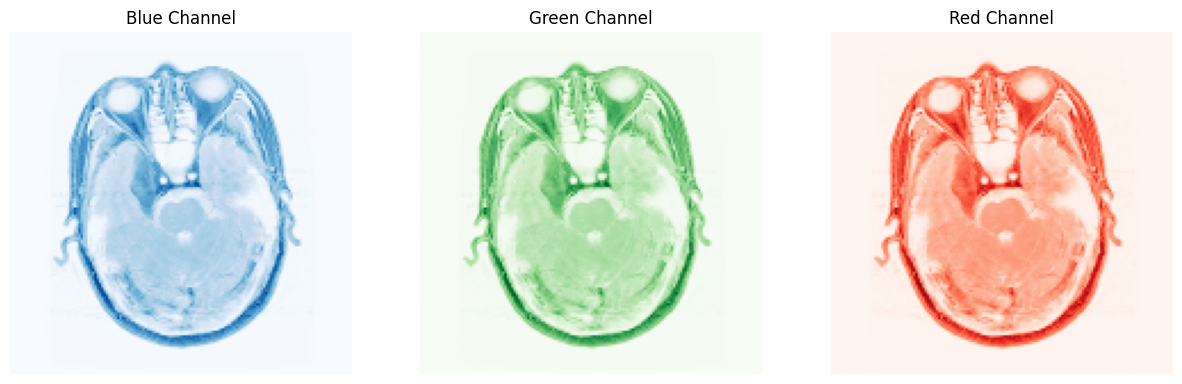

In [ ]:
img = cv2.imread('/content/drive/MyDrive/archive (1)/Training/meningioma/Tr-meTr_0003.jpg')

img_resized = cv2.resize(img, (150, 150))

b, g, r = cv2.split(img_resized)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(b, cmap='Blues')
axs[0].set_title('Blue Channel')
axs[0].axis('off')

axs[1].imshow(g, cmap='Greens')
axs[1].set_title('Green Channel')
axs[1].axis('off')

axs[2].imshow(r, cmap='Reds')
axs[2].set_title('Red Channel')
axs[2].axis('off')

plt.show()

22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step


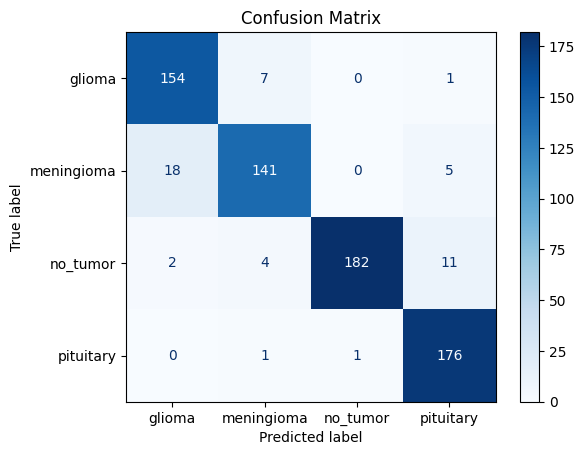

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

class_names = ['glioma', 'meningioma', 'no_tumor', 'pituitary']
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
img_array = np.array(img_resized)

img_array = img_array.reshape(1, 150, 150, 3)

print(img_array.shape)

(1, 150, 150, 3)


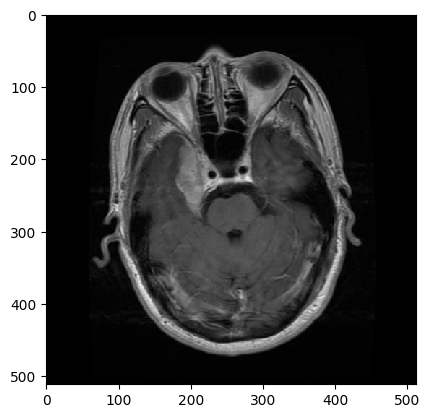

In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img = image.load_img('/content/drive/MyDrive/archive (1)/Training/meningioma/Tr-meTr_0003.jpg')
plt.imshow(img, interpolation='nearest')
plt.show()

In [ ]:
a = model.predict(img_array)
indices = a.argmax()
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
print("Predicted Label:", labels[indices])
print("Tumor Detected" if labels[indices] != 'notumor' else "No Tumor Detected")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Predicted Label: meningioma
Tumor Detected


In [ ]:
os.makedirs("models", exist_ok=True)

In [ ]:
model.save("models/detection_model.keras")

In [ ]:
from google.colab import files
files.download('/content/models/detection_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>